### Logistic Regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import probflow as pf
import warnings
import torch

plt.rcParams['axes.grid'] = False
warnings.filterwarnings('ignore')
pf.set_backend('pytorch')

class LogisticRegression(pf.CategoricalModel) :
    def __init__(self, dims):
        self.w = pf.Parameter([dims, 1], name = 'Weights') # weights
        self.b = pf.Parameter([1, 1], name = 'Bias') # bias
    
    def __call__(self, x):
        x = torch.tensor(x)
        return pf.Bernoulli(x @ self.w() + self.b())

In [15]:
randn = lambda *x: np.random.randn(*x).astype('float32')

# Settings
N = 1000 #number of datapoints
D = 3    #number of features

# Generate data
x = randn(N, D)
w = np.array([[2.], [0.1], [-2.]]).astype('float32')
noise = randn(N, 1)
y = np.round(1./(1. + np.exp(-(x @ w + noise))))

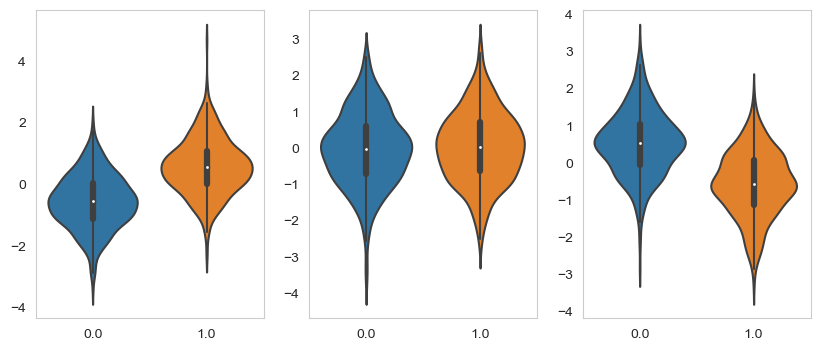

In [16]:
plt.figure(figsize = (10, 4))
for i in range(D) :
    plt.subplot(1, D, i+1)
    sns.violinplot(x = y[:, 0], y = x[:, i])

In [17]:
model = LogisticRegression(D)
model.fit(x, y, lr = 0.01)

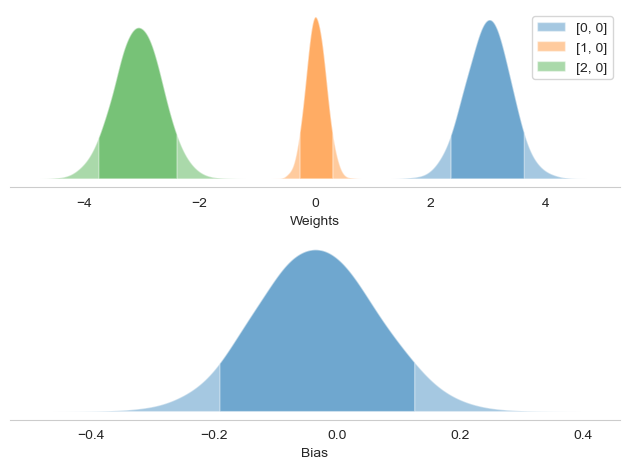

In [18]:
model.posterior_plot(ci = 0.9)

### Multinimial Logistic Regression

In [52]:
N = 1000 # number of datapoints
D = 4 # number of features
K = 3 # number of target classes

# Generate data
x = randn(N, D)
w = randn(D, K)
noise = randn(N, 1)
y = np.argmax(x @ w + noise, axis = 1).astype('float32')

x = x.astype('float32')
y = y.astype('int32')

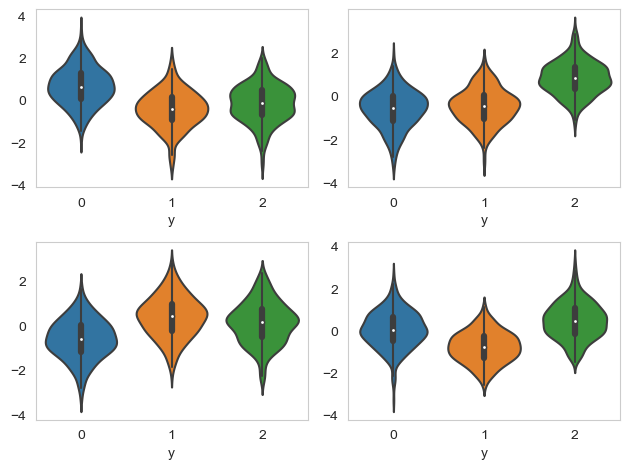

In [53]:
for i in range(D) :
    plt.subplot(2, 2, i+1)
    sns.violinplot(x = y, y = x[:, i])
    plt.xlabel('y')
plt.tight_layout()
plt.show()

In [54]:
class LogisticRegression(pf.CategoricalModel):
    def __init__(self, dims, num_classes):
        self.w = pf.Parameter([dims, num_classes], name='Weights')  # weights
        self.b = pf.Parameter([1, num_classes], name='Bias')  # bias

    def __call__(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        logits = x @ self.w() + self.b()
        return pf.Categorical(logits=logits)

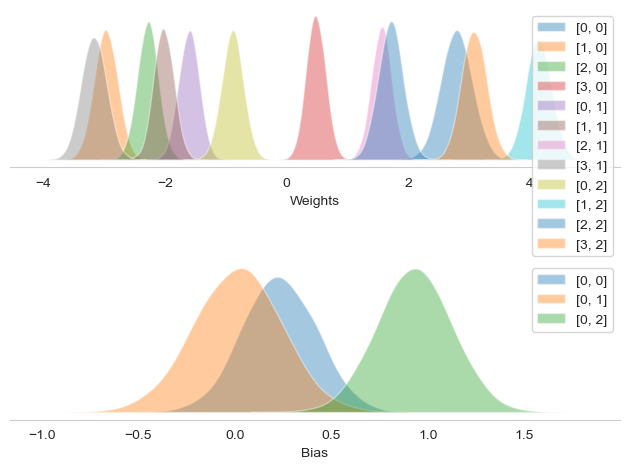

In [55]:
model = LogisticRegression(D, K)
model.fit(x, y, lr = 0.01, epochs = 200)
model.posterior_plot()

In [62]:
predictions = model.predict(x[:5, :])
print(predictions)

[nan nan nan nan nan]


In [57]:
x_test = randn(1, D)
model.pred_dist_plot(x_test)

ValueError: Number of rows must be a positive integer, not 1.0

<Figure size 640x480 with 0 Axes>

In [58]:
x_test = randn(1, D)
model.pred_dist_plot(x_test)

ValueError: Number of rows must be a positive integer, not 1.0

<Figure size 640x480 with 0 Axes>